# Analiza podatkov o IMDB-jevi lestvici najboljših 250 serij po ocenah ljudi

Ta zvezek vsebuje analizo podatkov o IMDB-jevi lestvici, pomožni skripti za analizo so v parse_data/helpers.

Analizirali bomo:
- Porazdelitev serij po tipu (serijia ali miniserija)
- Porazdelitev serij po državah
- Porazdelitev serij po letih
- Porazdelitev serij po št. glasov iz IMDB-ja
- Pogostost medijskih kanalov in produkcijskih hiš
- 
    Število nagrajencev po področju;
    Porazdelitev nagrajencev po državah;
    Pogostost univerz;
    Razporeditev po spolu;
    Države glede na število nagrajencev.





In [1]:
# ## AUTORELOADING OF MODULES
import conf.jupyter_notebook_conf  # noqa: F401

In [2]:
import pandas as pd


path_to_full_data_csv = "./../../output/toptv_shows_full_data.csv"
df = pd.read_csv(path_to_full_data_csv)

# Popravki za boljšo preglednost
# "Korea, Republic of" = South Korea
df["trakt_country_of_origin"] = df["trakt_country_of_origin"].replace({"Korea, Republic of": "South Korea"})

In [3]:
# Najprej lahko na hitro pogledamo koliko je med top 250 serijami dejansko serij in miniserij
# Serije so ponavadi daljše, več sezon, medtem ko imajo miniserije ponavadi od 3 do 10 epizod in načeloma samo eno sezono
from helpers.serije_miniserije import tabela_serije_miniserije_razmerje

tabela_serije_miniserije_razmerje(df)

,Tip serije,Št. serij,% Serij
0,Vse skupaj,250,100 %
1,TV Series,211,84 %
2,TV Mini Series,39,15 %


Zdaj lahko primerjamo še po državah, glede na serije in miniserije in oboje skupaj, ter še procentualno

In [4]:
from helpers.serije_miniserije import tabela_serije_miniserije_po_drzavah


tabela_serije_miniserije_po_drzavah(df)

,Država izvora,Št. vseh serij,Serije,Miniserije,% Serije,% Miniserije
0,Australia,2,2,0,100 %,0 %
1,Turkey,6,6,0,100 %,0 %
2,Sweden,1,1,0,100 %,0 %
3,South Korea,5,5,0,100 %,0 %
4,Serbia,1,1,0,100 %,0 %
5,Poland,1,0,1,0 %,100 %
6,Norway,1,1,0,100 %,0 %
7,New Zealand,1,0,1,0 %,100 %
8,United Kingdom,50,38,12,76 %,24 %
9,United States,121,103,18,85 %,15 %


Ker vidimo, da miniserije predstavljajo samo 15 procentov vsega, jih bomo od zdaj naprej obravnavali skupaj

## Analiza po letih
sedaj bomo pogledali koliko serij je bilo aktivnih v posameznik letih (da se niso zaključile)
tiste, ki se torej še snemajo, bomo označili leto zaključka kot letos.
Lahko bi rekli da bomo videli 'zlata leta' serij.

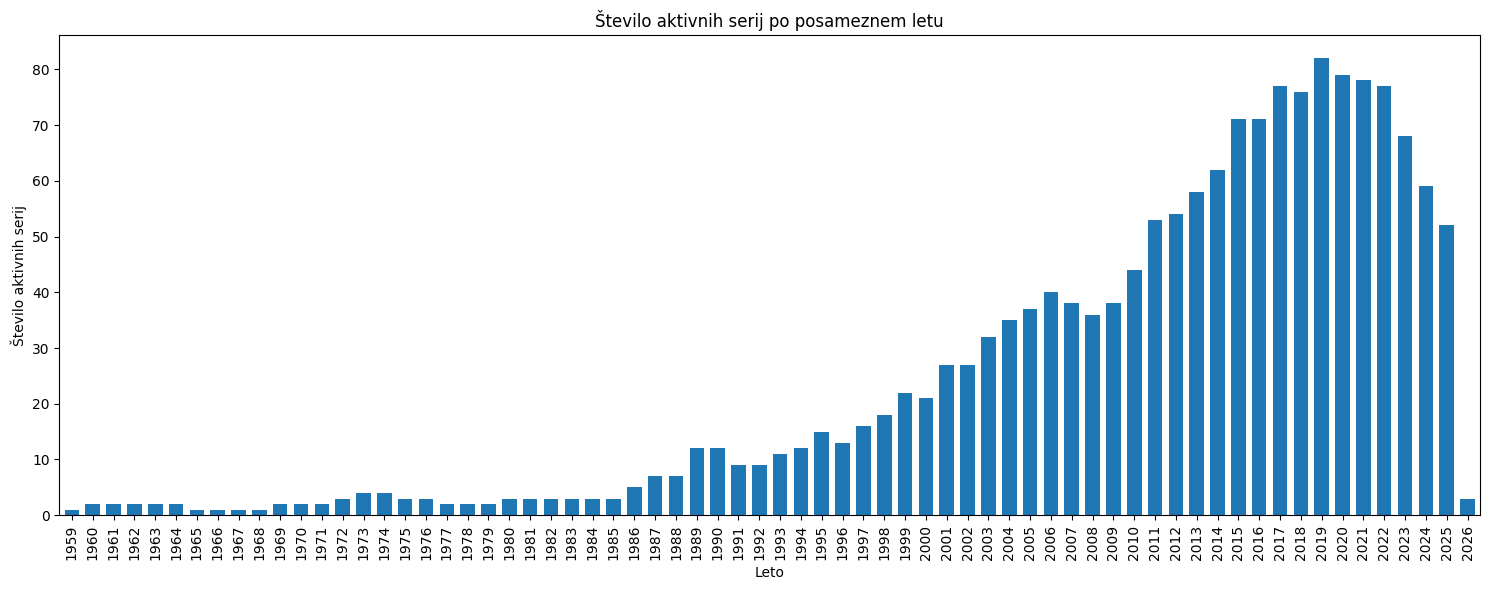

In [19]:
from helpers.serije_miniserije import plot_active_series

result_df = plot_active_series(df)